Here we install the necessary packages needed for our "poimagic" system to work

In [ ]:
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes

Here we plot all the earthquake data, and then figure out the density in each cell. Based on this we do the above plots.

Earthquake_2020_9_2020_10_filtered.csv
[[27, -122.306, 38.5575], [24, -117.9613333, 36.4528333], [28, -115.1903, 44.3665], [44, -114.9995, 44.28], [52, -104.3215, 31.6423]]
Earthquake_2021_11_2021_12_filtered.csv
[[22, -117.8513333, 36.1118333], [28, -115.1636, 44.3015], [25, -105.385, 43.5805], [29, -97.4595, 38.6752]]
Earthquake_2022_7_2022_8_filtered.csv
[[28, -116.0314, 38.16]]
D1_Data.csv
[]
Earthquake_2021_9_2021_10_filtered.csv
[[24, -122.7086667, 38.7613333], [30, -119.5305, 38.5156667], [22, -119.1796667, 36.5901667], [23, -117.979, 38.132], [43, -115.1655, 44.3161], [21, -101.6262147, 32.31719971]]
Earthquake_2020_11_2020_12_filtered.csv
[[24, -118.8443333, 37.6118333], [32, -115.2064, 44.5225], [31, -104.1503, 31.7192]]
Earthquake_2022_1_2022_2_filtered.csv
[[29, -117.7771, 38.1861], [23, -105.3439, 43.9027]]
Earthquake_2021_7_2021_8_filtered.csv
[[37, -123.1173333, 39.1446667], [21, -121.1828333, 36.5781667], [23, -110.9323333, 44.7905], [21, -105.4033, 43.6861]]
Earthquake

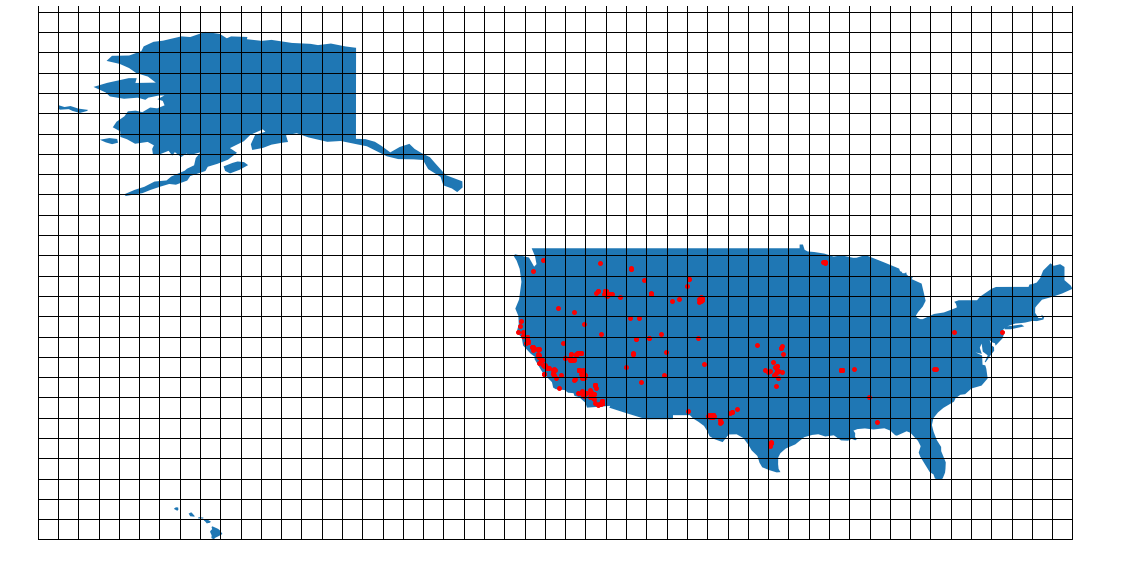

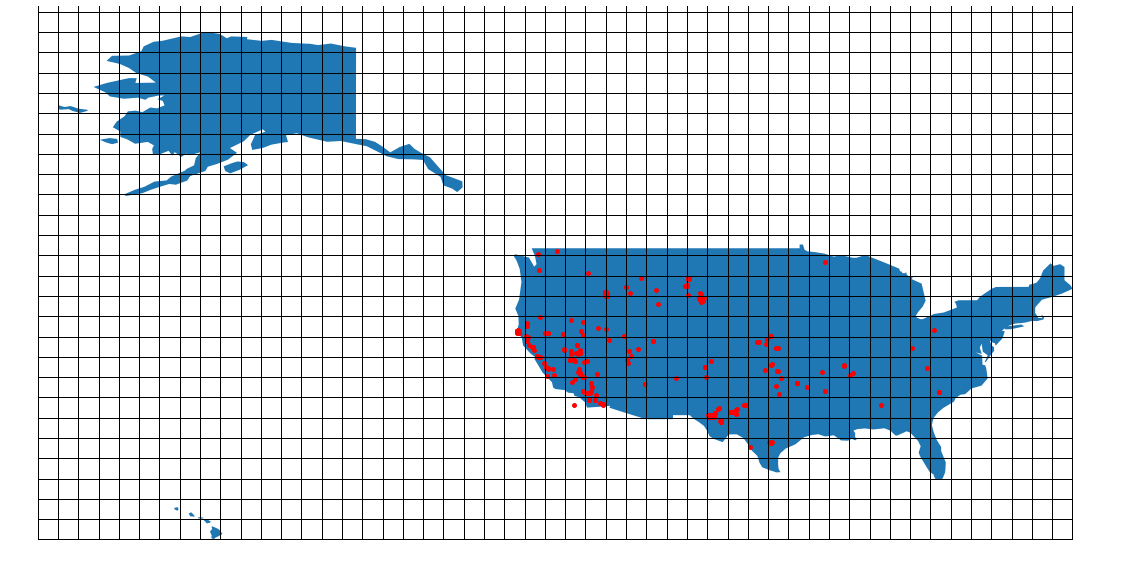

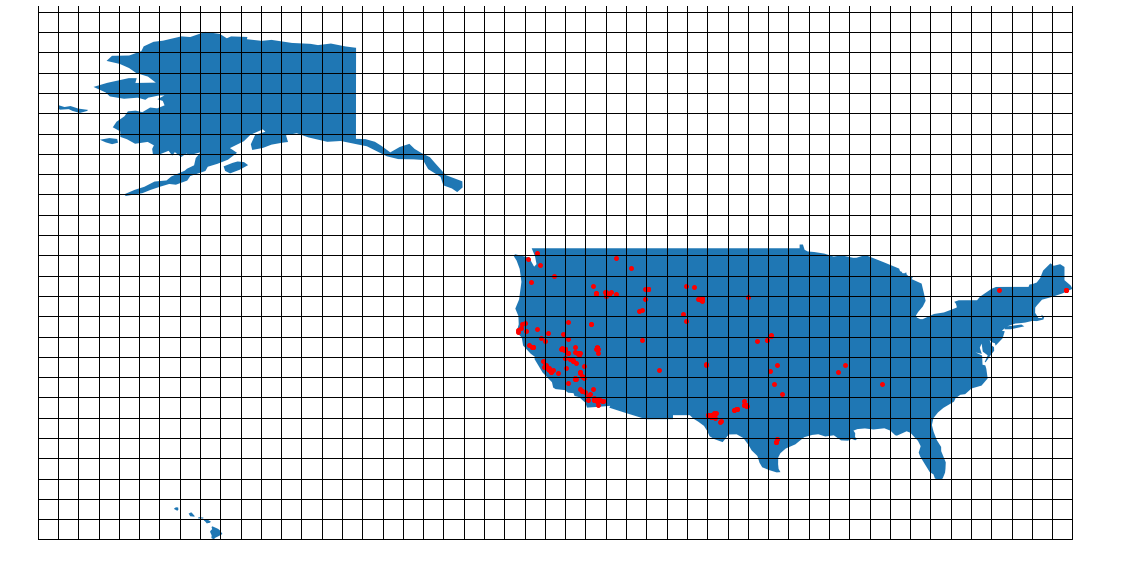

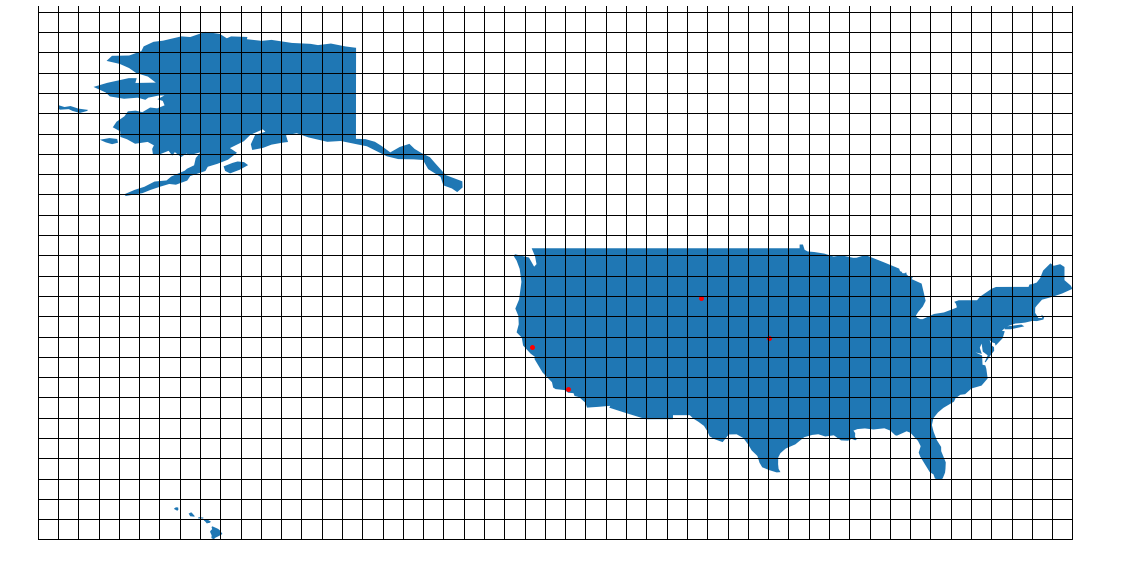

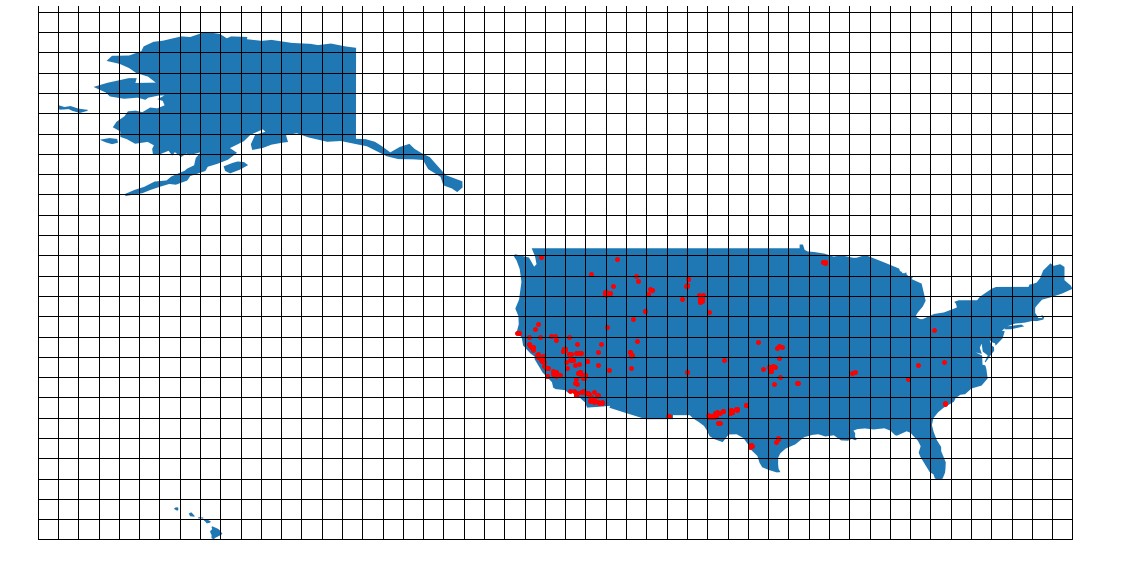

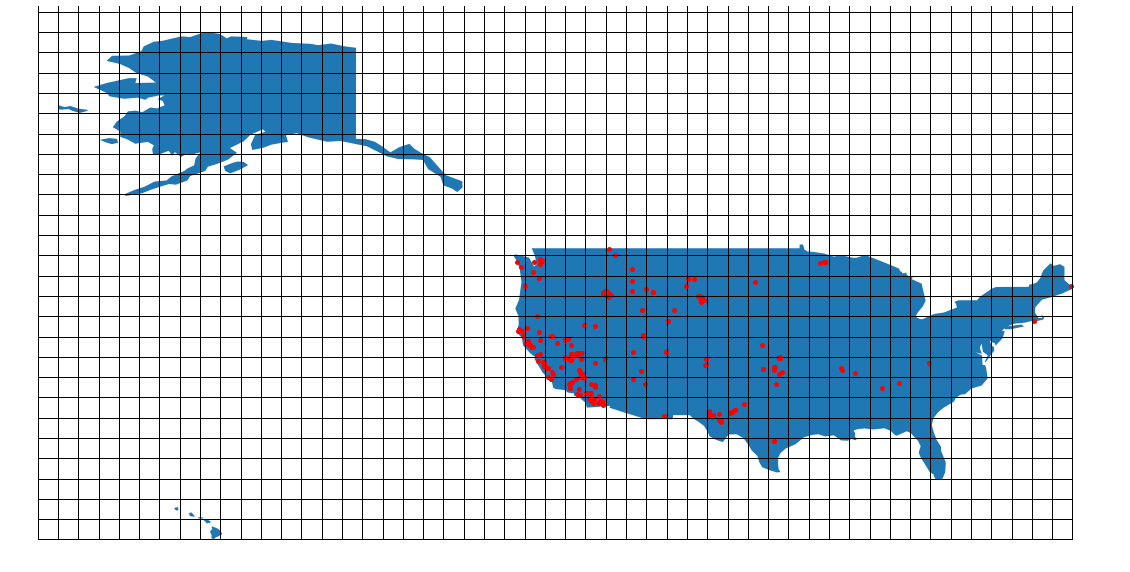

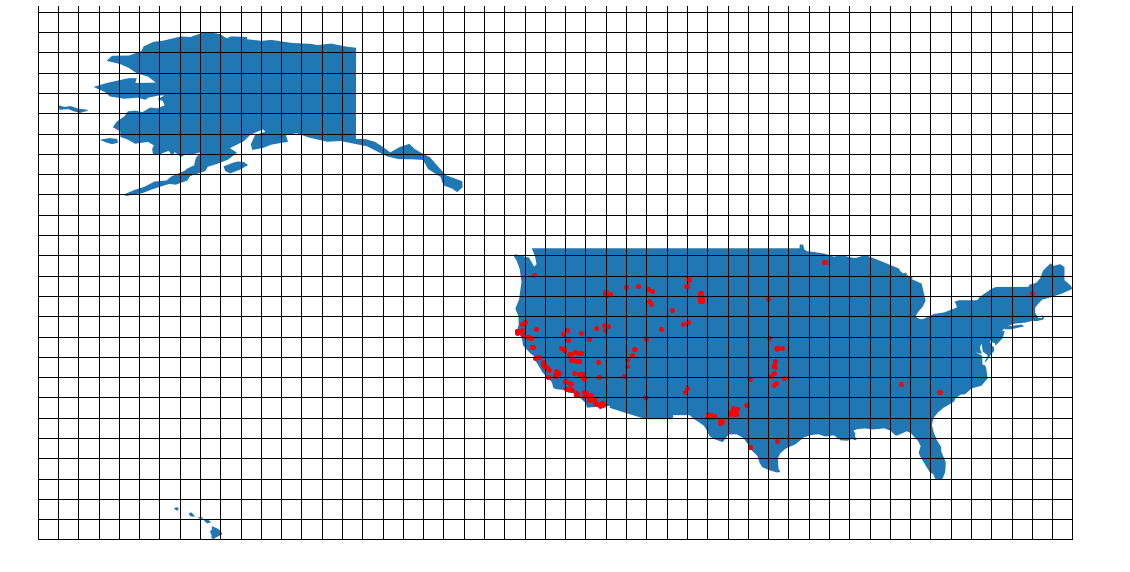

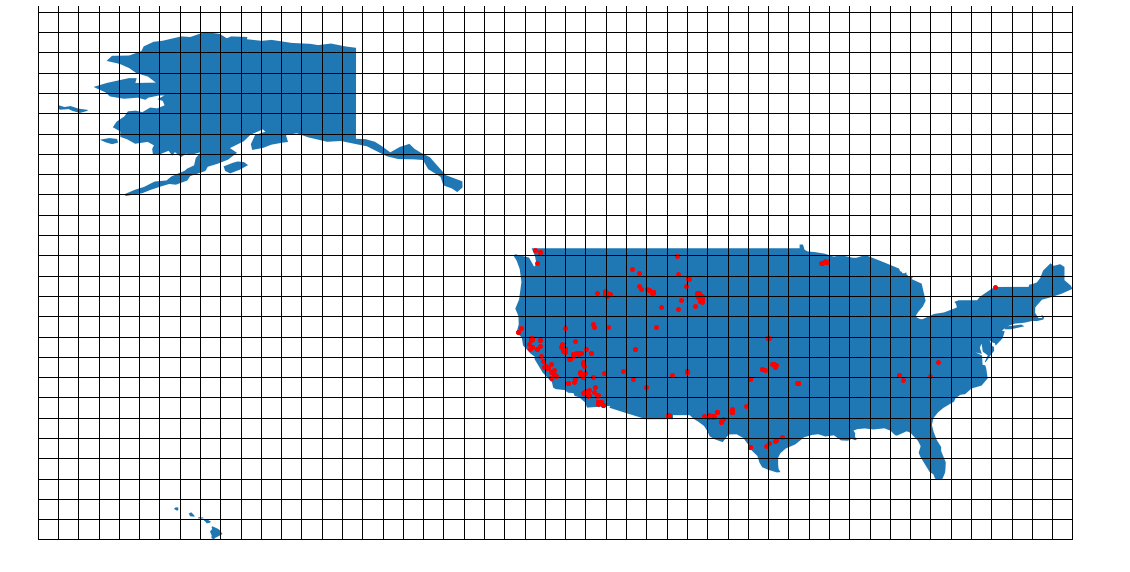

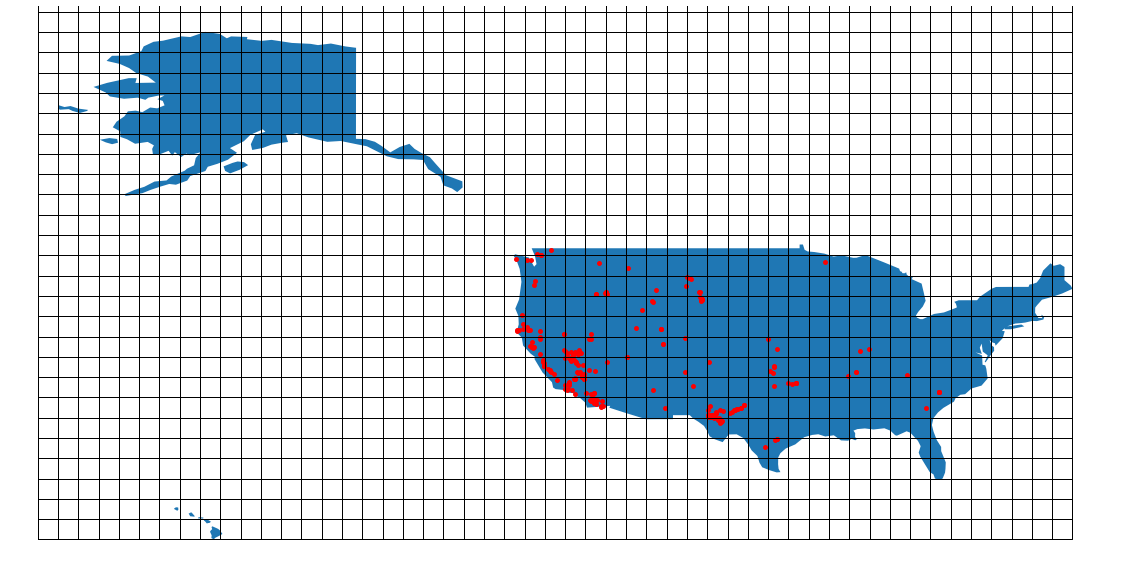

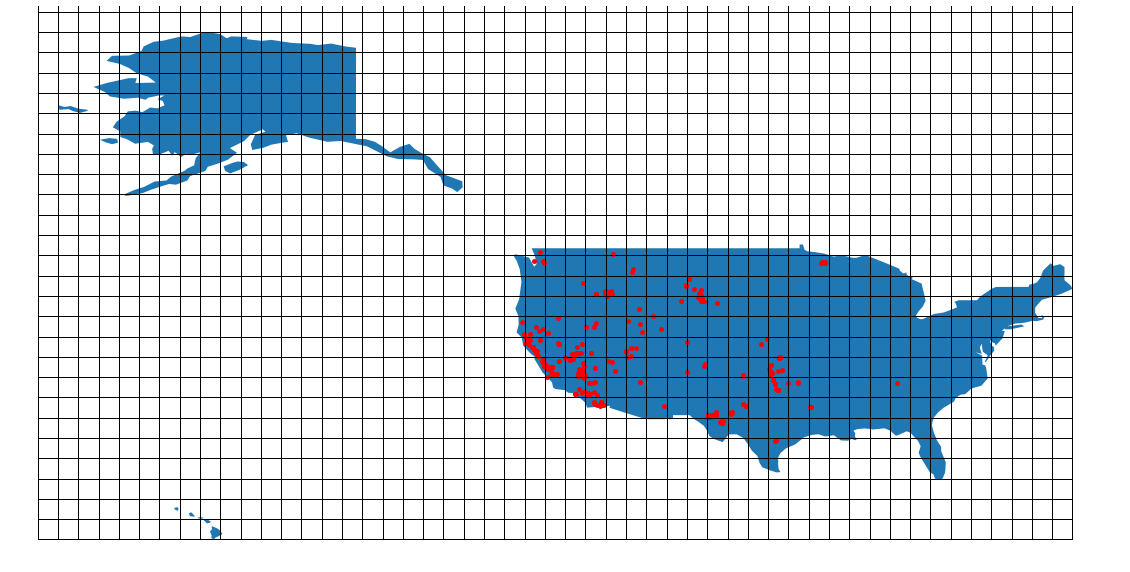

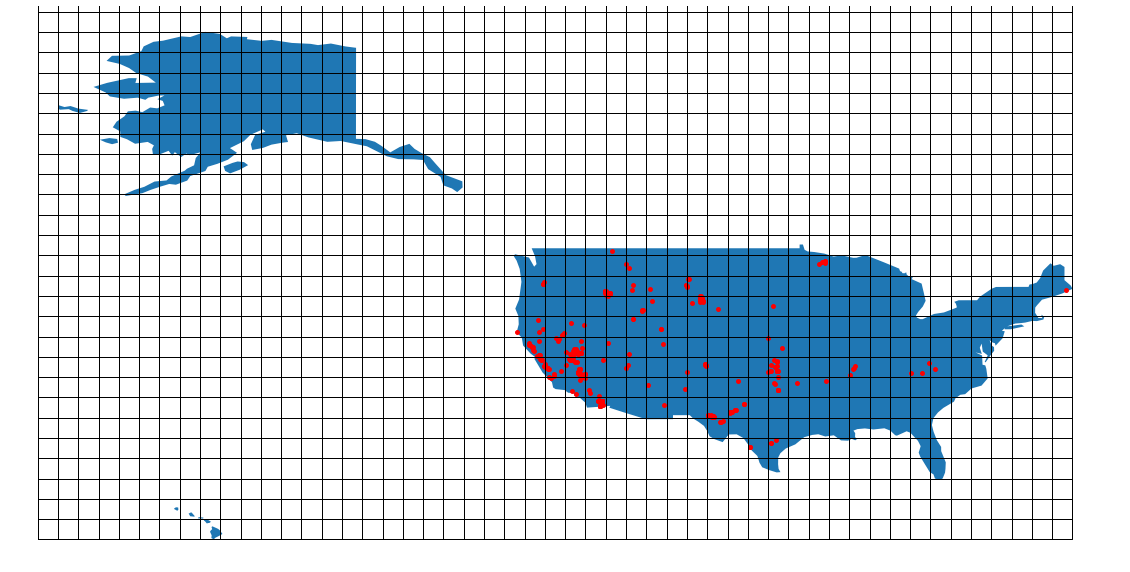

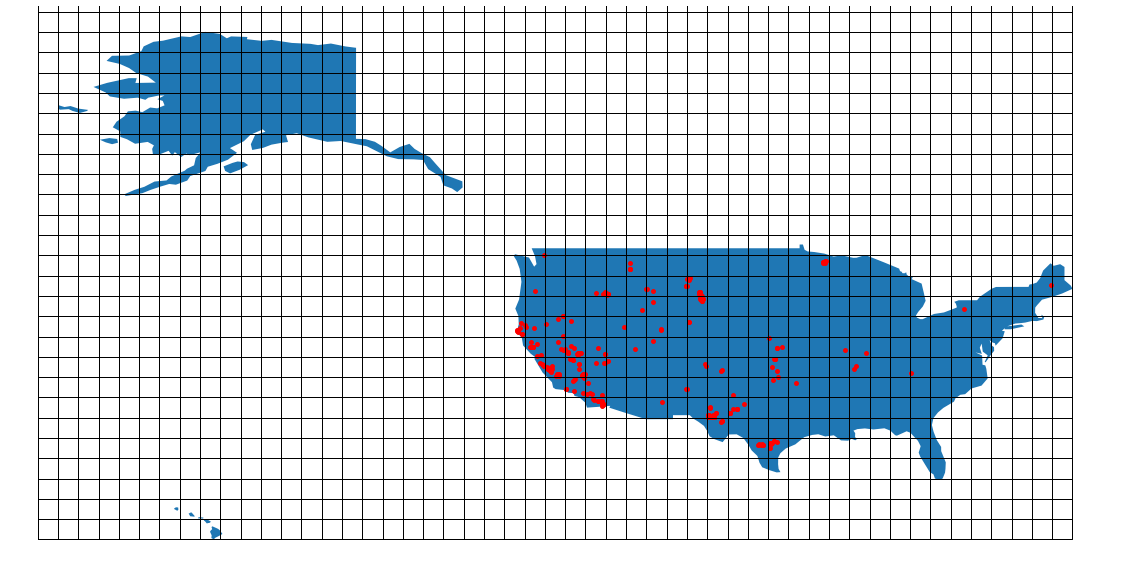

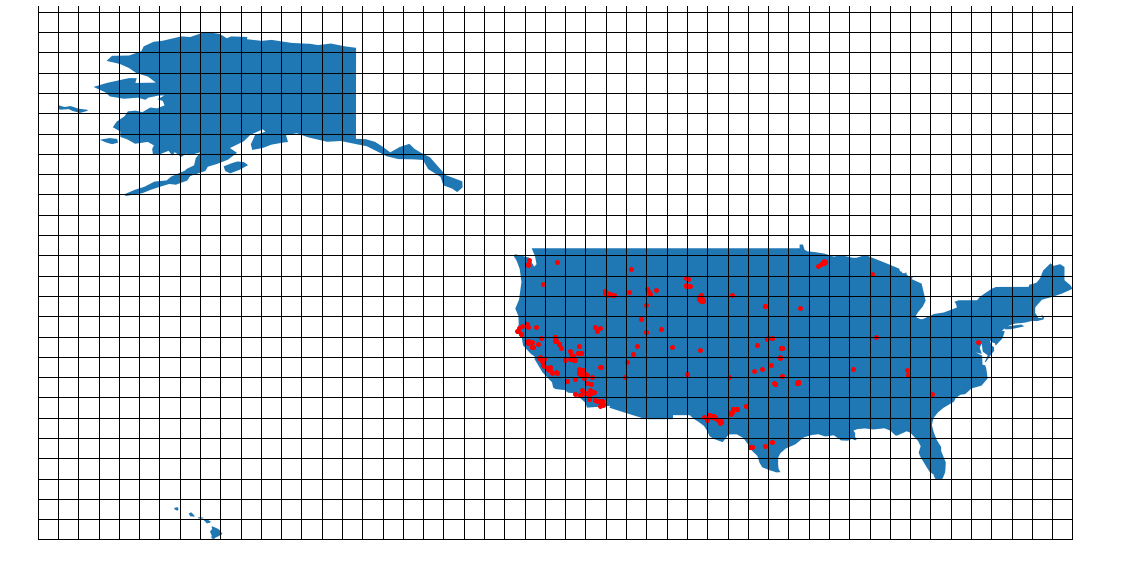

In [ ]:
# import required module
import os
%matplotlib inline
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import shapely
import numpy as np

# assign directory
directory = '/content/EarthQuake_Data'

abc = 0
# iterate over files in
# that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f) and filename != 'D1_data.csv':
        df_plot_all = pd.read_csv(f)
        df_plot_all.head()
        world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
        geom_all = [Point(xy) for xy in zip(df_plot_all.longitude, df_plot_all.latitude)]
        gdf_all = gpd.GeoDataFrame(df_plot_all, geometry=geom_all)
        usa = world[world.name == 'United States of America']
        cell_pairs = []
        # total area for the grid
        xmin, ymin, xmax, ymax= usa.total_bounds
        # how many cells across and down
        n_cells=50
        cell_size = (xmax-xmin)/n_cells
        # projection of the grid
        crs = "+proj=sinu +lon_0=0 +x_0=0 +y_0=0 +a=6371007.181 +b=6371007.181 +units=m +no_defs"
        # create the cells in a loop
        grid_cells = []
        for x0 in np.arange(xmin, xmax+cell_size, cell_size ):
            for y0 in np.arange(ymin, ymax+cell_size, cell_size):
                # bounds
                x1 = x0-cell_size
                y1 = y0+cell_size
                cell_pairs.append([x0,y0,x1,y1])
                grid_cells.append( shapely.geometry.box(x0, y0, x1, y1)  )
        cell = gpd.GeoDataFrame(grid_cells, columns=['geometry'], 
                                 crs=crs)
        memo = [0]*len(cell_pairs)
        lon_memo = [0]*len(cell_pairs)
        lat_memo = [0]*len(cell_pairs)
        d1_points = []
        abc += 1
        for pnt in range(len(gdf_all['latitude'])):  
            longi = gdf_all['longitude'][pnt]
            latit = gdf_all['latitude'][pnt]
            ind = 0
            for num in cell_pairs:
              ind += 1
              x0 = num[0]
              y0 = num[1]
              x1 = num[2]
              y1 = num[3]
              if (latit > y0 and latit < y1) and (longi < x0 and longi > x1):
                  memo[ind] = memo[ind] + 1
                  lon_memo[ind] = longi
                  lat_memo[ind] = latit

        for indecies in range(len(memo)):
            if memo[indecies] < 60 and memo[indecies] > 20:
                d1_points.append([memo[indecies], lon_memo[indecies], lat_memo[indecies]])
        print(filename)
        print(d1_points)  
        ax = gdf_all.plot(ax=usa.plot(figsize=(20,20)), marker='o', color='red',markersize=15)
        plt.autoscale(False)
        cell.plot(ax=ax, facecolor="none", edgecolor='black')
        ax.axis("off") 

## Europe Dataset 

Using the same technique for the Europe Dataset and plot the maps each month from 2016 - 2018

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:661: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:661: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:661: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consum

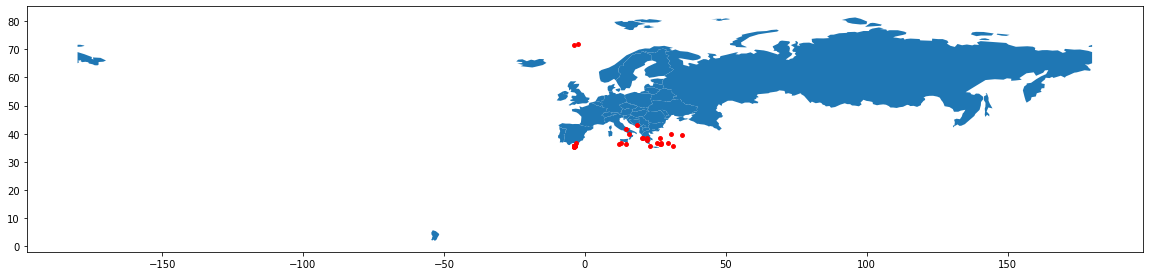

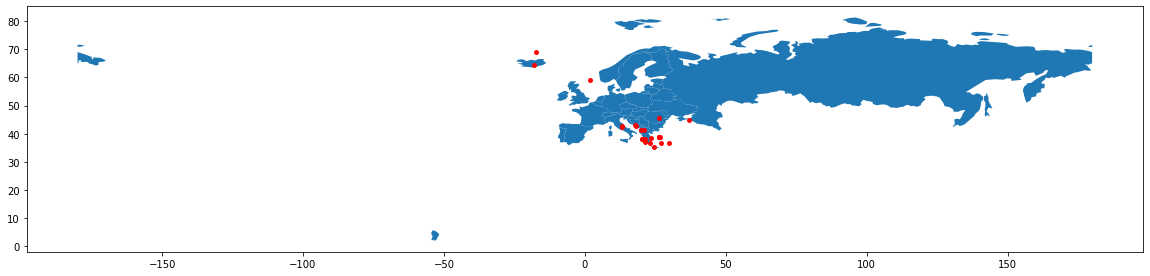

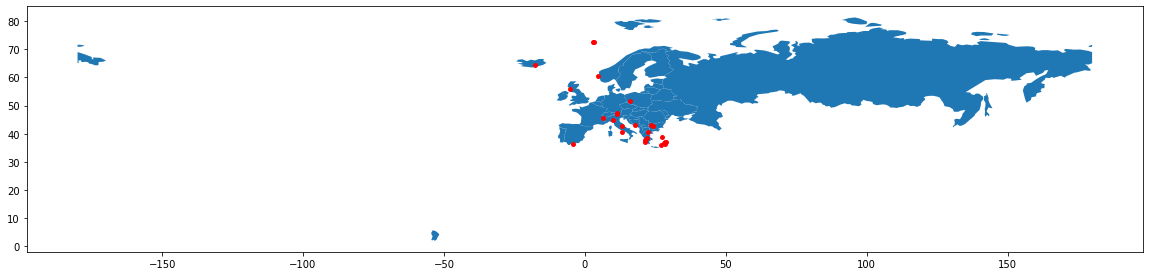

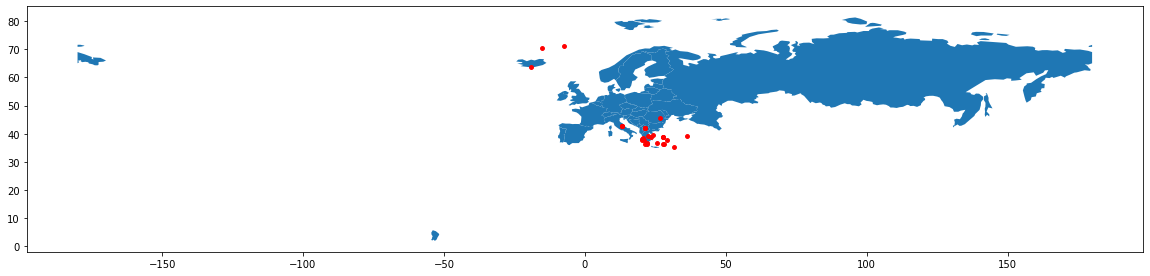

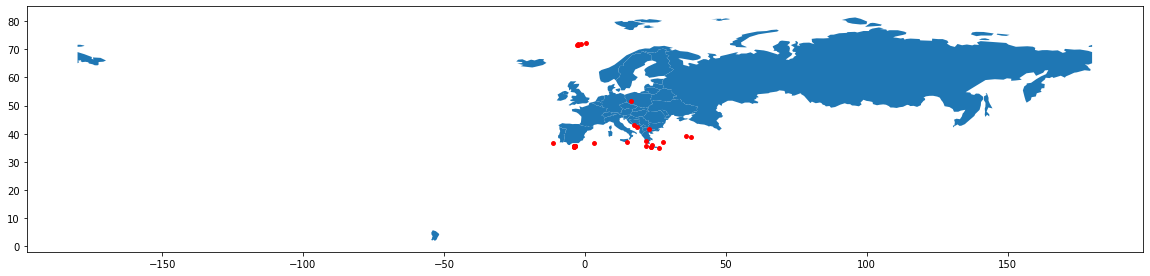

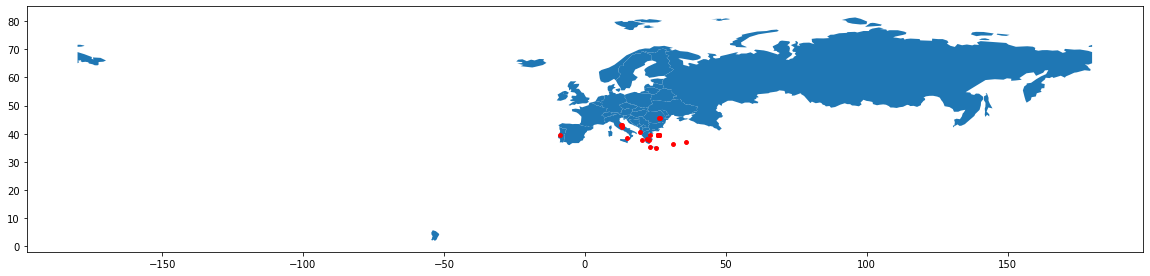

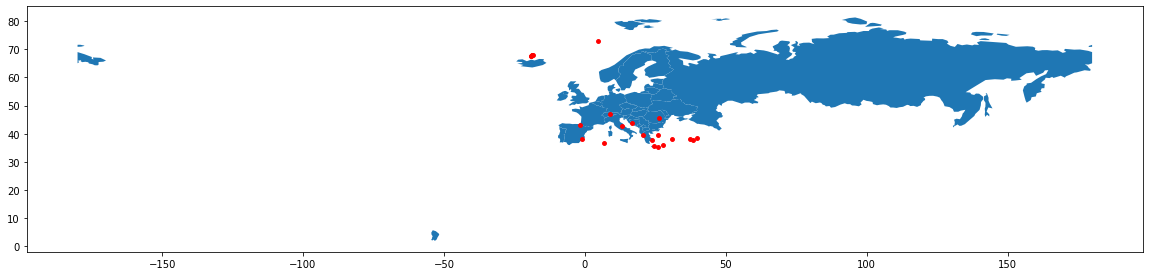

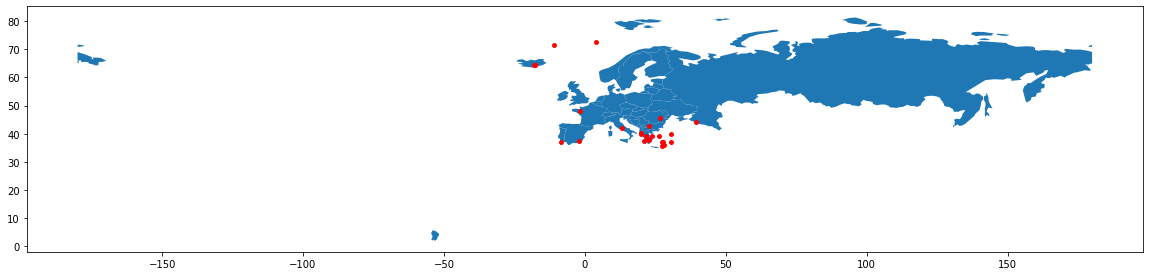

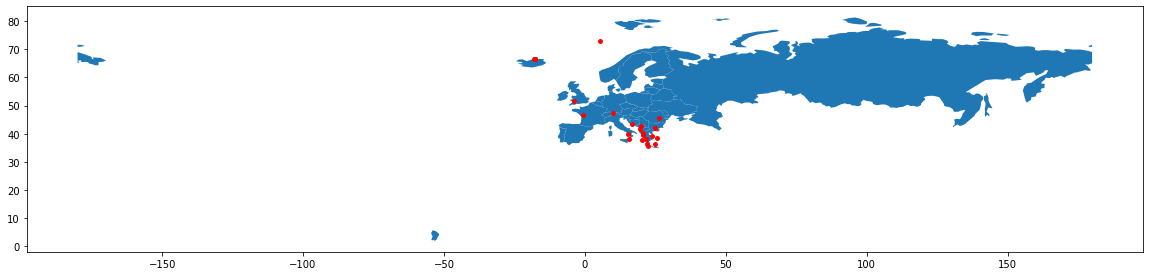

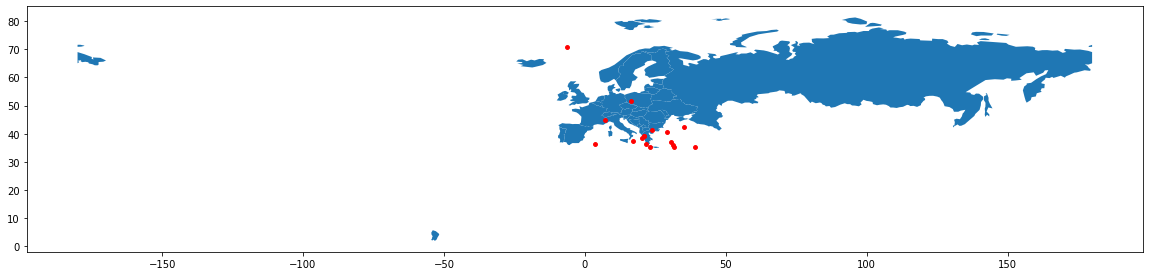

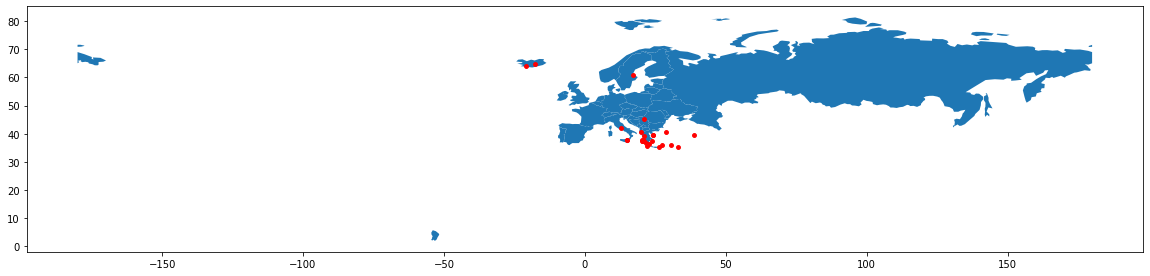

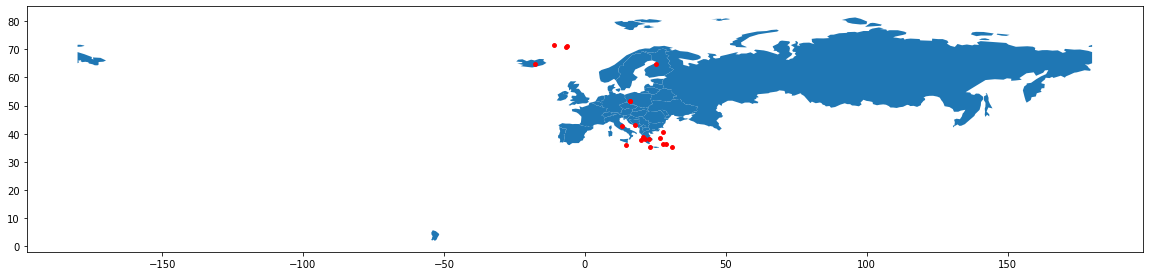

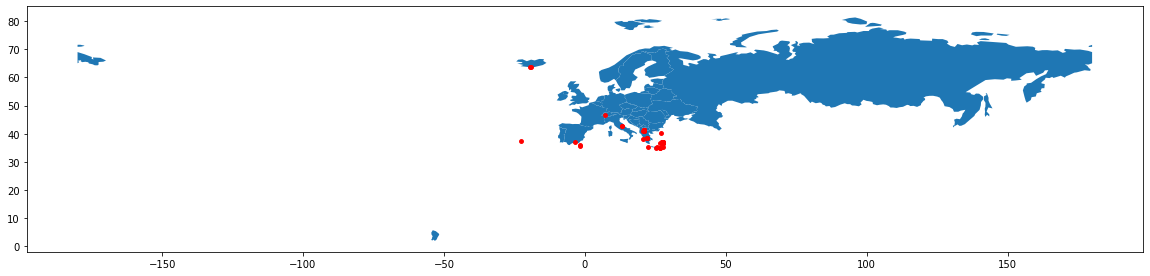

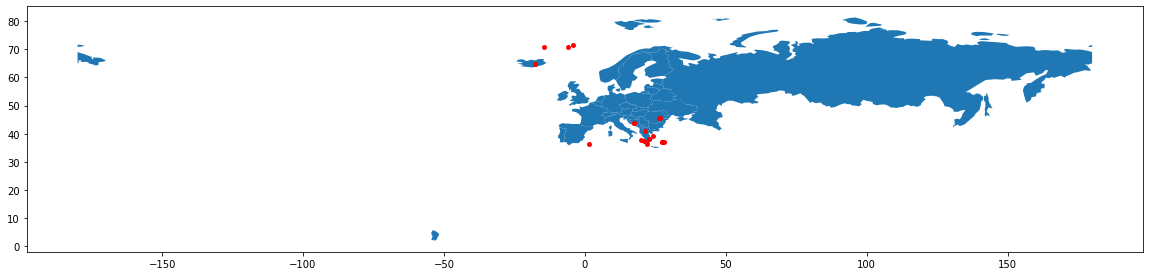

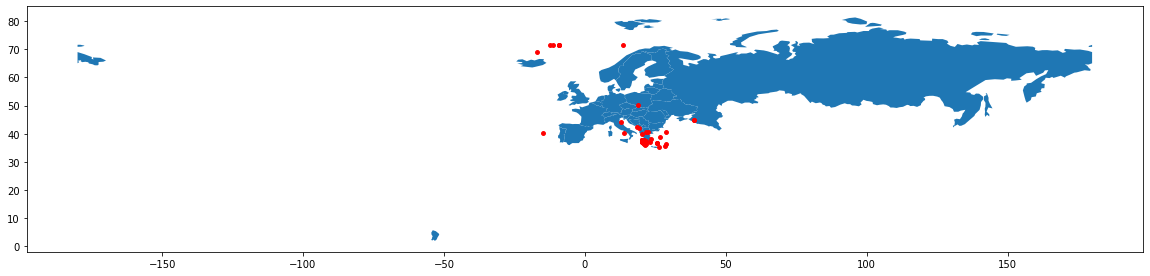

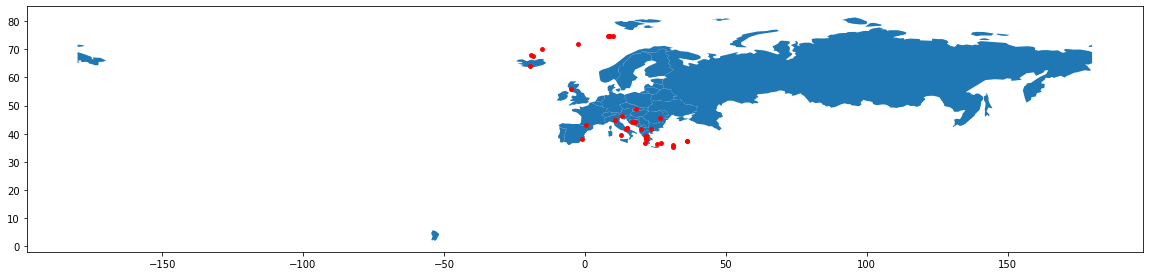

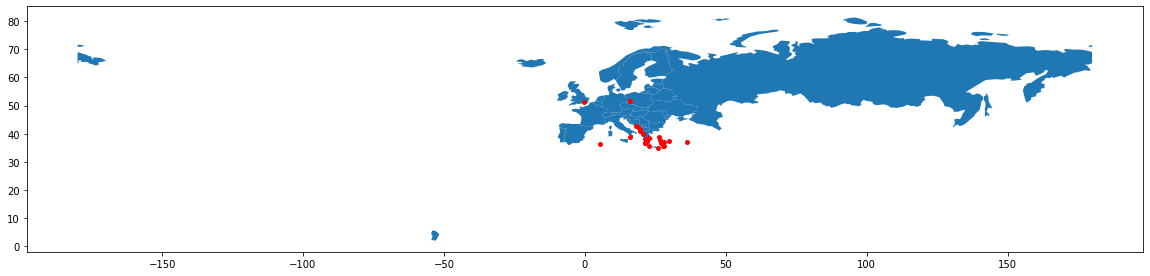

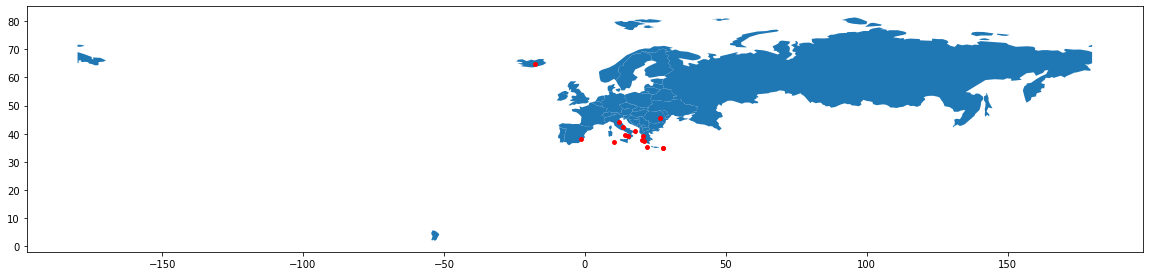

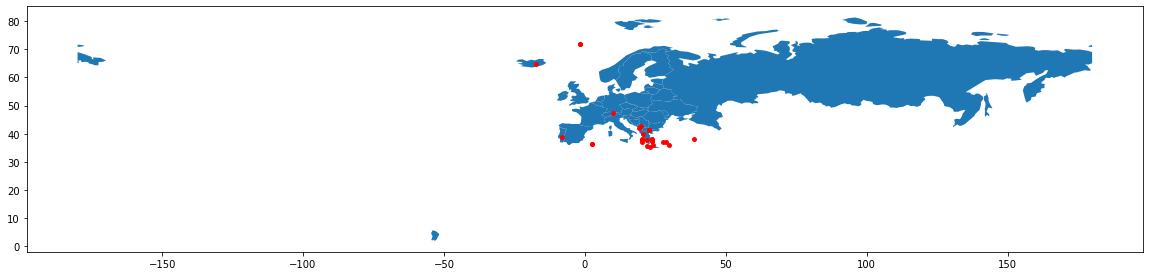

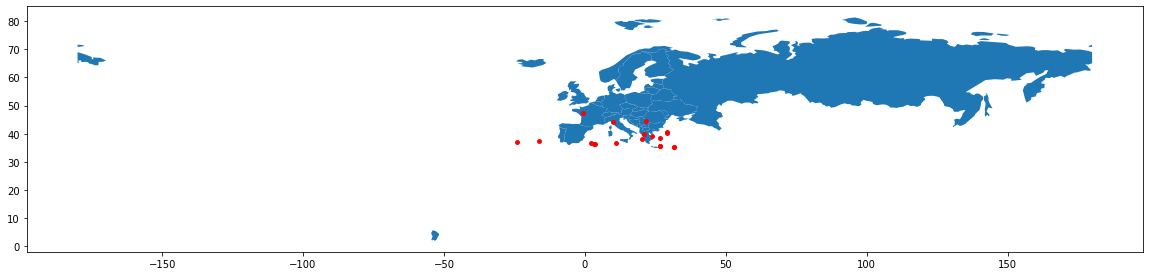

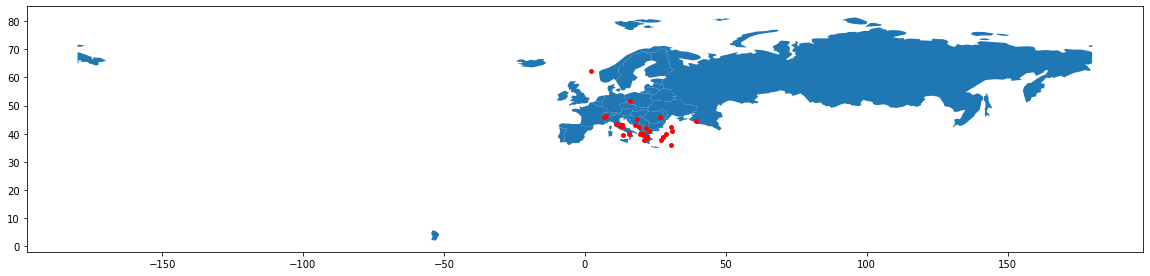

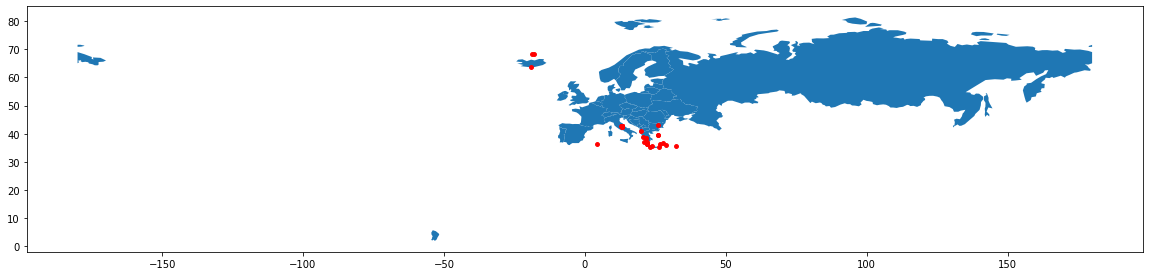

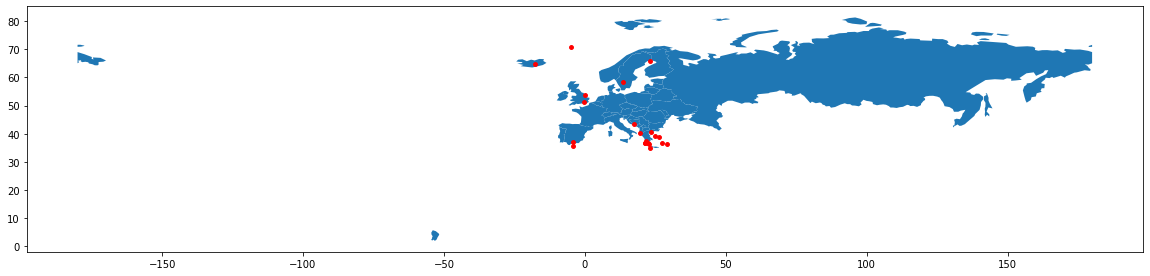

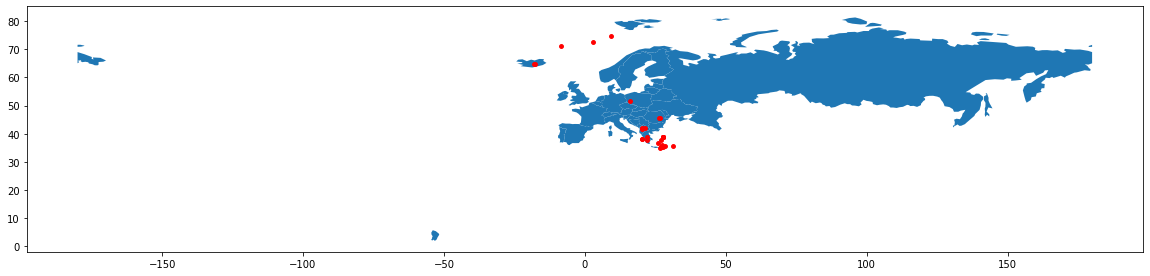

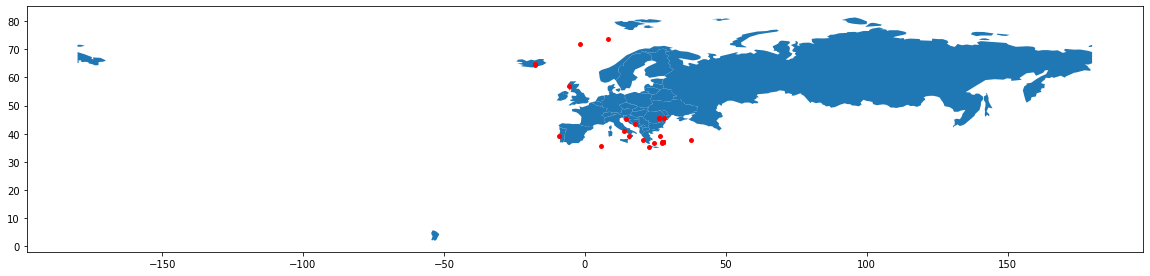

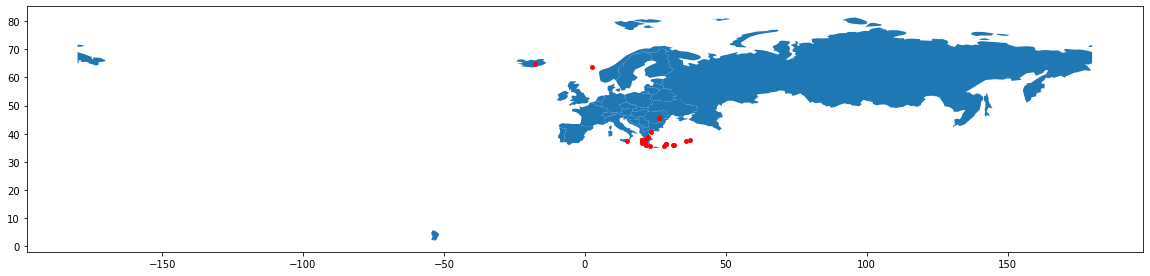

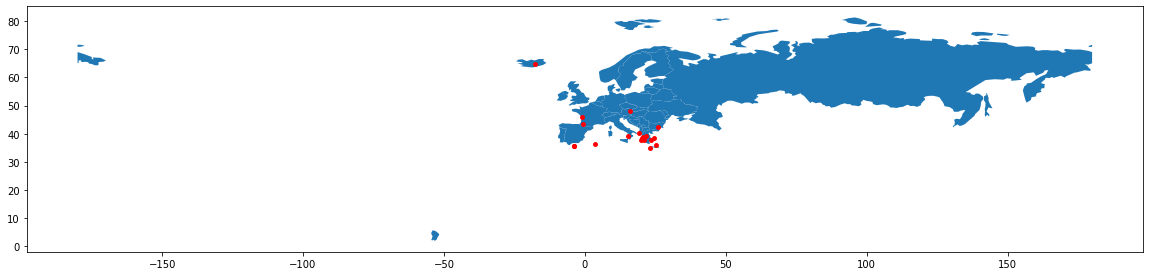

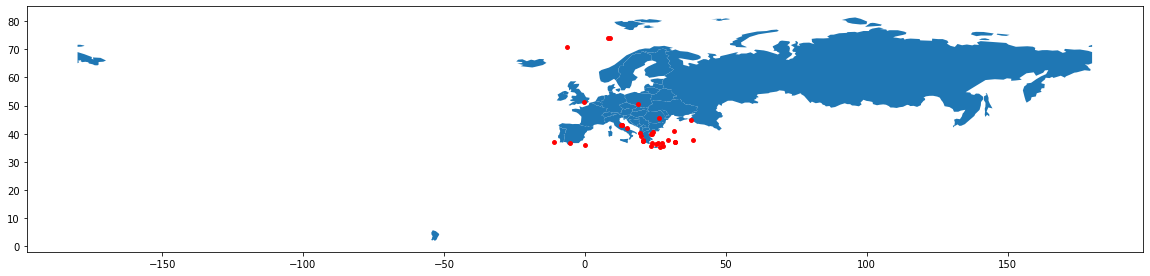

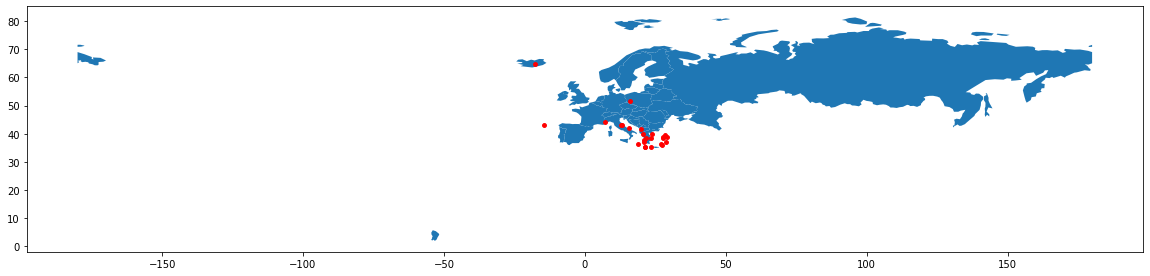

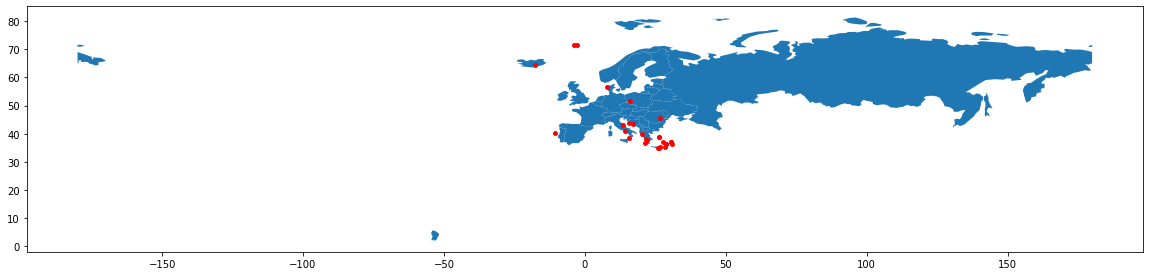

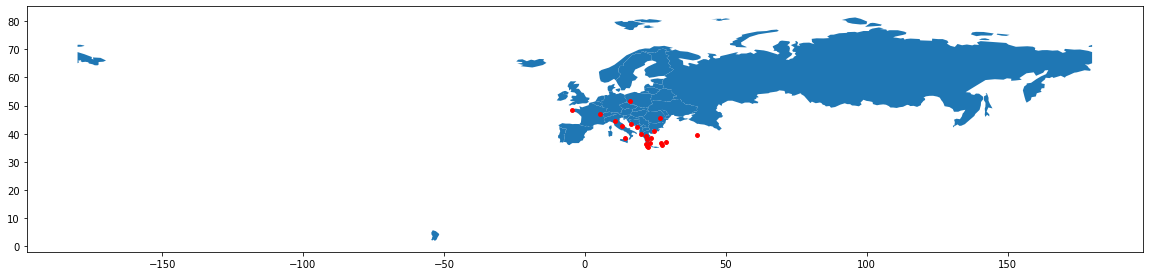

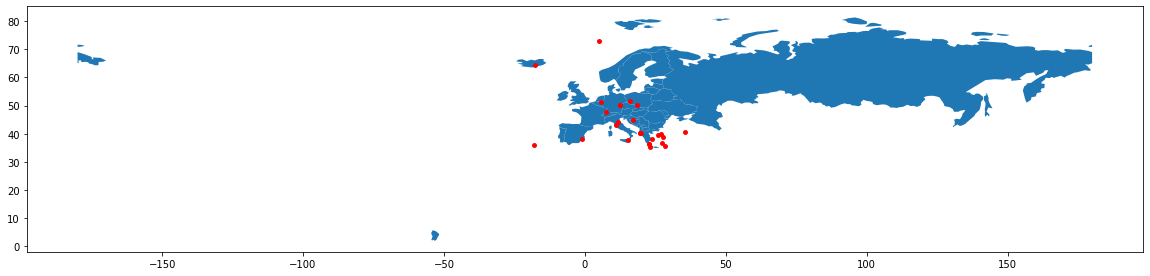

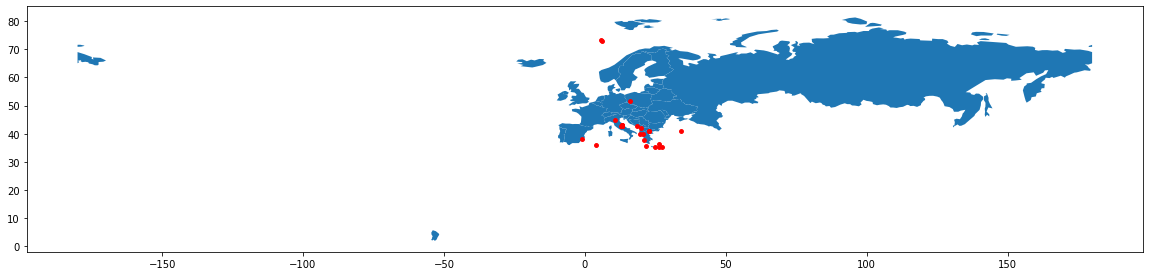

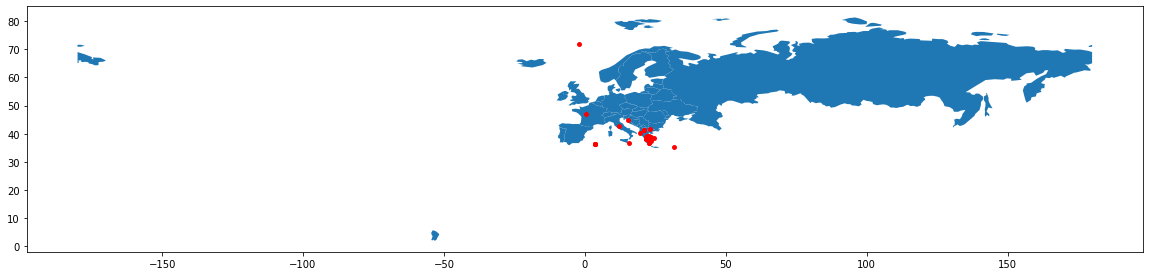

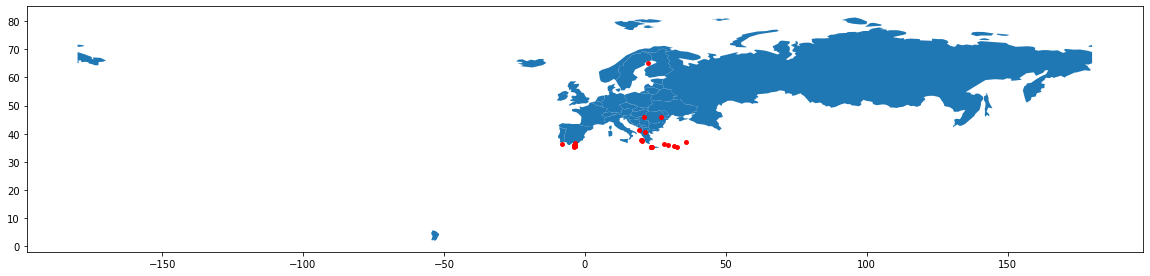

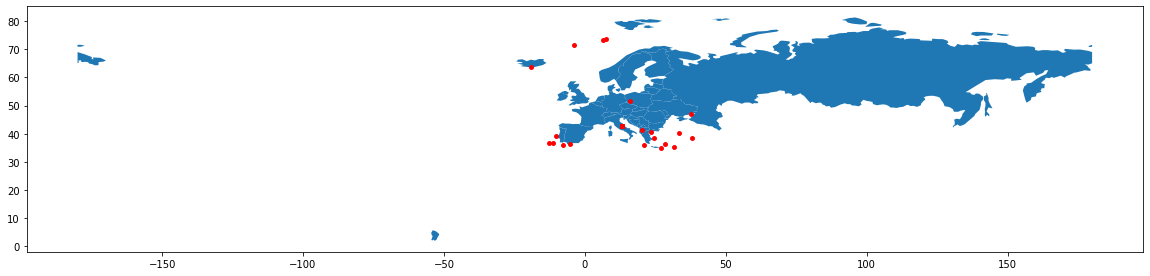

In [ ]:
# import required module
import os
%matplotlib inline
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import shapely
import numpy as np

# assign directory
directory = '/content/EarthQuake_Data'

abc = 0
# iterate over files in
# that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f) and filename != 'D1_data.csv':
        df_plot_all = pd.read_csv(f)
        df_plot_all.head()
        world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
        geom_all = [Point(xy) for xy in zip(df_plot_all.longitude, df_plot_all.latitude)]
        gdf_all = gpd.GeoDataFrame(df_plot_all, geometry=geom_all)
        usa = world[world.continent == 'Europe']
        ''' cell_pairs = []
        # total area for the grid
        xmin, ymin, xmax, ymax= usa.total_bounds
        # how many cells across and down
        n_cells=25
        cell_size = (xmax-xmin)/n_cells
        # projection of the grid
        crs = "+proj=sinu +lon_0=0 +x_0=0 +y_0=0 +a=6371007.181 +b=6371007.181 +units=m +no_defs"
        # create the cells in a loop
        grid_cells = []
        for x0 in np.arange(xmin, xmax+cell_size, cell_size ):
            for y0 in np.arange(ymin, ymax+cell_size, cell_size):
                # bounds
                x1 = x0-cell_size
                y1 = y0+cell_size
                cell_pairs.append([x0,y0,x1,y1])
                grid_cells.append( shapely.geometry.box(x0, y0, x1, y1)  )
        cell = gpd.GeoDataFrame(grid_cells, columns=['geometry'], 
                                 crs=crs)
        memo = [0]*len(cell_pairs)
        lon_memo = [0]*len(cell_pairs)
        lat_memo = [0]*len(cell_pairs)
        d1_points = []
        abc += 1
        for pnt in range(len(gdf_all['latitude'])):  
            longi = gdf_all['longitude'][pnt]
            latit = gdf_all['latitude'][pnt]
            ind = 0
            for num in cell_pairs:
              ind += 1
              x0 = num[0]
              y0 = num[1]
              x1 = num[2]
              y1 = num[3]
              if (latit > y0 and latit < y1) and (longi < x0 and longi > x1):
                  memo[ind] = memo[ind] + 1
                  lon_memo[ind] = longi
                  lat_memo[ind] = latit

        for indecies in range(len(memo)):
            if memo[indecies] < 60 and memo[indecies] > 20:
                d1_points.append([memo[indecies], lon_memo[indecies], lat_memo[indecies]])
        print(filename)
        print(d1_points)  
        '''
        ax = gdf_all.plot(ax=usa.plot(figsize=(20,20)), marker='o', color='red',markersize=15)
        plt.autoscale(False)
        #cell.plot(ax=ax, facecolor="none", edgecolor='black')
        #ax.axis("off") 

Plotting High Density D1 Maps, and by simply changing some parameters also the D2 points.

In [ ]:
%matplotlib inline
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

df_plot_all = pd.read_csv("/content/EarthQuake_Data/D1_Data.csv")
df_plot_all.head()

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
geom_all = [Point(xy) for xy in zip(df_plot_all.longitude, df_plot_all.latitude)]

gdf_all = gpd.GeoDataFrame(df_plot_all, geometry=geom_all)
usa = world[world.name == 'United States of America']

D1_Data.csv is inside zip file and used the long and latitude from d1 and d2 to get the images

Text(0.5, 1.0, 'Earthquake_2022_1_2022_2')

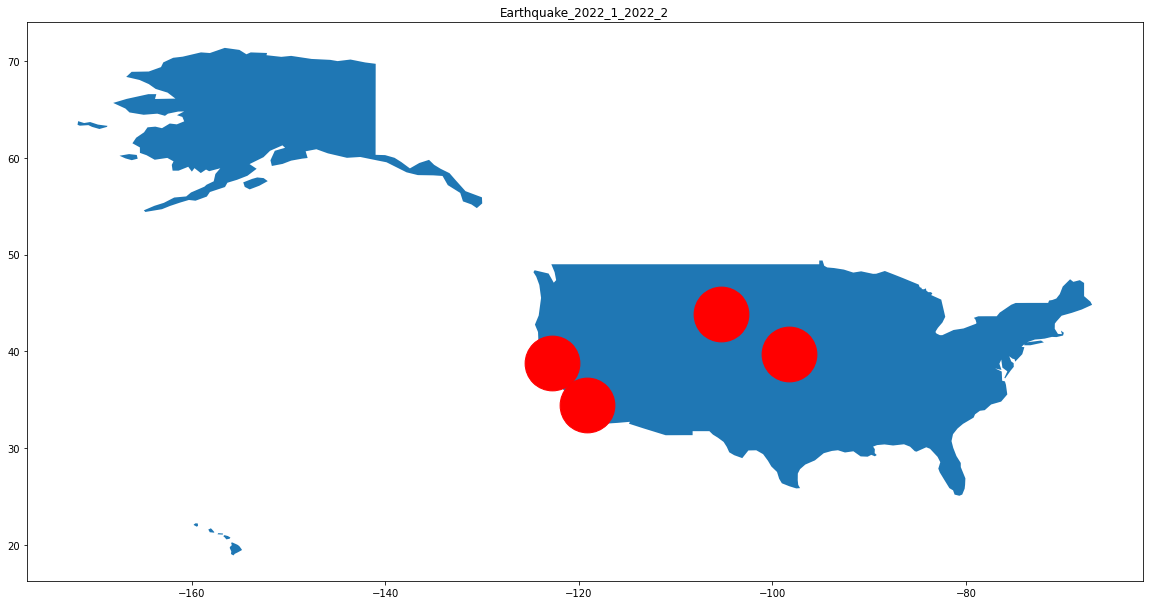

In [ ]:
gdf_all.plot(ax=usa.plot(figsize=(20,20)), marker='o', color='red',markersize=3000)
plt.title("Earthquake_2022_1_2022_2")